<a href="https://colab.research.google.com/github/hugotorres22/data-analysis/blob/master/Spotipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ideias:

New is always better (Heat map para ver se ando a ouvir musica que adicionei recentemente)

Divisão por estilos

Divisão por artistas

Horas ouvidas por dia

Horas mais frequentes a ouvir

Estilo mais predominante por hora

Caracteristicas da musica

In [ ]:
!pip install spotipy
!pip install wordcloud
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install git+https://github.com/plamere/spotipy.git --upgrade


  Cloning https://github.com/plamere/spotipy.git to c:\users\hsilv\appdata\local\temp\pip-req-build-848e85ny
  Resolved https://github.com/plamere/spotipy.git to commit 7fc08809f0289ebff229819b02d10e5631d6dee1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/plamere/spotipy.git 'C:\Users\hsilv\AppData\Local\Temp\pip-req-build-848e85ny'
You should consider upgrading via the 'C:\Users\hsilv\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 KB 6.0 MB/s eta 0:00:00
     --------------------------------------- 36.9/36.9 MB 25.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\hsilv\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
import pandas as pd
import time
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns 

In [22]:
client_id = '005cbf60d85544348778d9b30a85fc67'
client_key = '45162ed0f7954b2f8339ca79dd233aa6'
playlist_id = '0hYPWa4VNYl1qkiMaPJHc0'
user_id = '1179099822'
scope = 'user-library-read'

sp_login = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_key,
                                               redirect_uri="http://localhost:8888/callback",
                                               scope="user-read-recently-played"))


client_credentials_manager = SpotifyClientCredentials(client_id, client_key)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [23]:
sp_login.current_user_recently_played()

{'items': [{'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7oZLKL1GjYiaAgssXsLmW8'},
       'href': 'https://api.spotify.com/v1/artists/7oZLKL1GjYiaAgssXsLmW8',
       'id': '7oZLKL1GjYiaAgssXsLmW8',
       'name': 'DOPE LEMON',
       'type': 'artist',
       'uri': 'spotify:artist:7oZLKL1GjYiaAgssXsLmW8'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
    

In [7]:
def get_tracks_id(tracks):
  
  track_ids = []
  
  for item in tracks:
    track_ids.append(item['track']['id'])

  return track_ids

In [8]:
def get_playlist_tracks(user_id, playlist_id):
    results = sp.user_playlist_tracks(user_id, playlist_id)
    tracks = get_tracks_id(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(get_tracks_id(results['items']))
    return tracks

In [9]:
def get_all_tracks(user_id, playlist_id):

  play_list = sp.user_playlist_tracks(user_id, playlist_id)

  tracks = []

  for item in play_list['tracks']['items']:
    track = item['track']['id']
    tracks.append(track)
  
  return tracks

In [10]:
def get_track_info(track):
  track_info = sp.track(track)

  name = track_info['name']
  artist_name = track_info['artists'][0]['name']
  artist_url = track_info['artists'][0]['external_urls']['spotify']
  album_name = track_info['album']['name']
  album_date = track_info['album']['release_date']
  album_popularity = track_info['popularity']
  track_duration = track_info['duration_ms']

  track_features = sp.audio_features(track)

  danceability = track_features[0]['danceability']
  energy = track_features[0]['energy']
  instrumentalness = track_features[0]['instrumentalness']
  liveness = track_features[0]['liveness']
  tempo = track_features[0]['tempo']

  track_complete_info = [name, artist_name, album_name, album_date, album_popularity, track_duration, danceability, energy, instrumentalness, liveness, tempo, artist_url]

  return track_complete_info

In [11]:
def get_artist_genre(artist):

  genres = []

  for item in artists:
    genres.append(sp.artist(item)['genres'])

  return genres

In [12]:
all_tracks = get_playlist_tracks(user_id, playlist_id)

track_info_list = []

for item in all_tracks:
  track_info_list.append(get_track_info(item))

df_tracks = pd.DataFrame(track_info_list, columns=['name', 'artist_name', 'album_name', 'album_date', 'album_popularity', 'track_duration', 'danceability', 'energy', 'instrumentalness', 'liveness', 'tempo','artist_url'])

In [13]:
#df_tracks['album_year'] = pd.to_datetime(df_tracks['album_year'], format='%Y-%m-%d').dt.year
df_tracks['album_year'] = pd.to_datetime(df_tracks['album_date'], format='%Y-%m-%d').dt.year

In [14]:
track_minutes = np.floor(df_tracks['track_duration']/1000/60).astype(int).astype(str)
track_seconds = np.mod(df_tracks['track_duration']/1000,60).astype(int).astype(str)
track_time = track_minutes.append(track_seconds).groupby(level=0).agg(':'.join)
df_tracks['track_duration'] = pd.to_datetime(track_time, format='%M:%S').dt.time

C:\Users\hsilv\AppData\Local\Temp\ipykernel_25160\3838577584.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  track_time = track_minutes.append(track_seconds).groupby(level=0).agg(':'.join)


In [15]:
df_tracks.tail()

,name,artist_name,album_name,album_date,album_popularity,track_duration,danceability,energy,instrumentalness,liveness,tempo,artist_url,album_year
1210,If Lovin' You Was Easier,Acid Tongue,The Night We Broke Our Lease,2019-03-22,26,00:02:39,0.620,0.724,0.000028,0.0450,174.044,https://open.spotify.com/artist/40Lbiq9N6jsxYe...,2019
1211,Nadar de Costas,The Happy Mess,Nadar de Costas,2021-06-25,26,00:03:23,0.767,0.502,0.000187,0.1050,117.983,https://open.spotify.com/artist/6c9g5UXzrOPXJJ...,2021
1212,My Friends Over You,New Found Glory,Sticks And Stones,2002-06-11,66,00:03:40,0.404,0.980,0.000000,0.0742,177.793,https://open.spotify.com/artist/4ghjRm4M2vChDf...,2002
1213,Blood Moon,Giraffe Tongue Orchestra,Broken Lines,2016-09-23,38,00:03:19,0.665,0.892,0.000046,0.3270,120.020,https://open.spotify.com/artist/1vfusWMe7GXj7a...,2016
1214,Texas Sun,Khruangbin,Texas Sun,2020-02-07,74,00:04:12,0.636,0.634,0.147000,0.0998,111.563,https://open.spotify.com/artist/2mVVjNmdjXZZDv...,2020


In [16]:
artists = df_tracks['artist_url'].unique()
genres = get_artist_genre(artists)

In [17]:
exploded_genres = pd.Series(genres, name='Genre').explode().reset_index()
text = ' '.join(str(i) for i in exploded_genres.Genre)

In [18]:
wordcloud = WordCloud(background_color='White').generate(text)

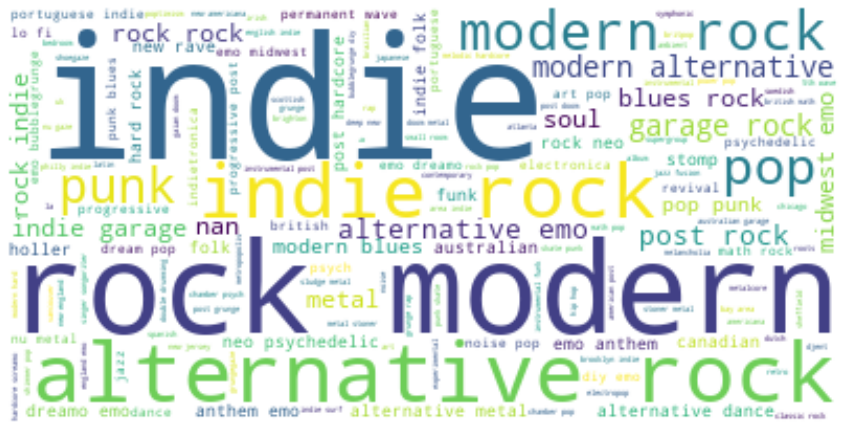

In [19]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()